# 1

In [12]:
import numpy
import os
import torch
import cv2
from sklearn.model_selection import train_test_split
import torch.nn as nn
import PIL.Image as Image
from PIL import Image
import matplotlib.pyplot as plt

In [13]:
file_path = [r"animals/cats", r"animals/dogs", r"animals/panda"]
categories = {0: "cat", 1: "dog", 2: "panda"}
def load_data():
    data = []
    for i in range(3):
        for file in os.listdir(file_path[i]):
            if file.endswith(".jpg"):
                img = cv2.imread(file_path[i] + "/" + file) 
                data.append([img, i, file_path[i] + "/" + file, None])
    return data
# data[index][image, lable_id, file_path, histogram]
data = load_data()
print(len(data))

3000


cat


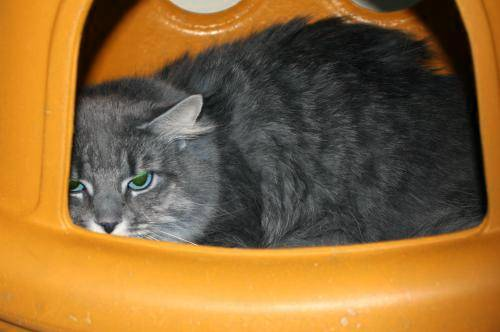

In [14]:
def display_an_image(data):
    idx = numpy.random.randint(0, len(data))
    img = data[idx][0]
    label = data[idx][1]
    img = Image.fromarray(img)
    print(categories[label])
    display(img)

display_an_image(data)

# 2

In [15]:
for i in range(len(data)):
    data[i][0] = cv2.resize(data[i][0], (256, 256))

idx = numpy.random.randint(0, len(data))
img = data[idx][0]
label = data[idx][1]

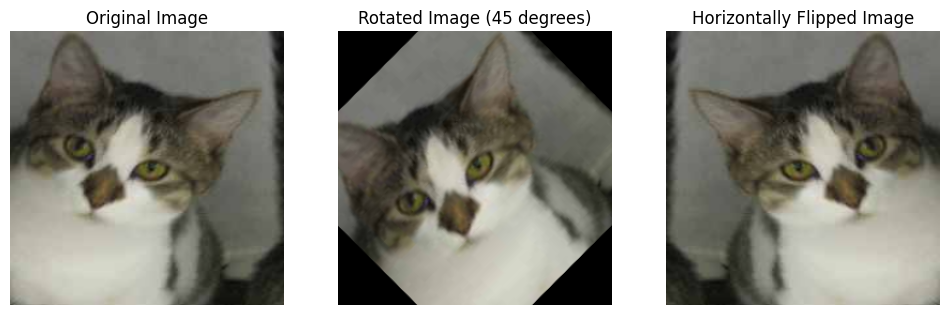

In [16]:
# Rotate the image by 45 degrees clockwise
angle = 45
rows, cols, _ = img.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
rotated_img = cv2.warpAffine(img, M, (cols, rows))
# Flip the image horizontally
flipped_img = cv2.flip(img, 1)

# Display the original, rotated, and flipped images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (45 degrees)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB))
plt.title('Horizontally Flipped Image')
plt.axis('off')

plt.show()

# 3

In [17]:
import cv2
import numpy as np

def extract_SIFT_feature(img):
    # Load an image
    image, _, img_path, _ = img

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Save keypoints and descriptors to a file
    np.save(img_path + '_keypoints.npy', np.array([kp.pt for kp in keypoints]))
    np.save(img_path + '_descriptors.npy', descriptors)

for i in range(len(data)):
    extract_SIFT_feature(data[i])


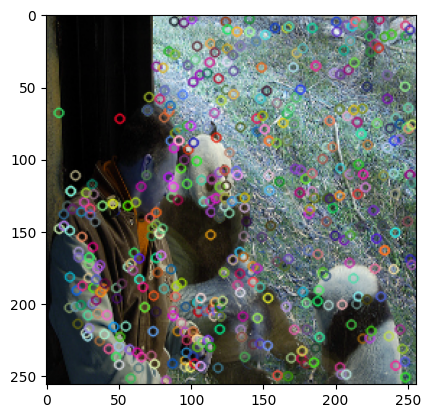

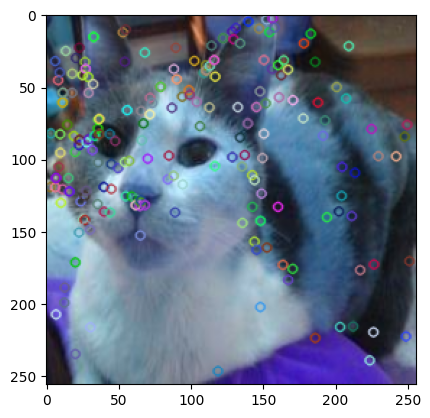

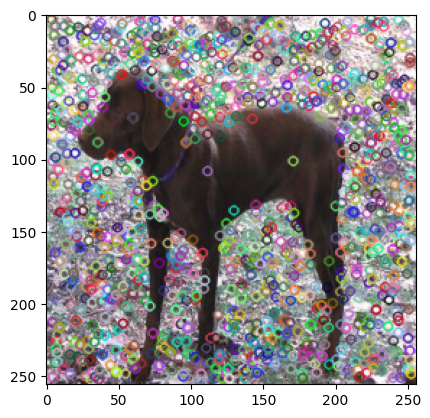

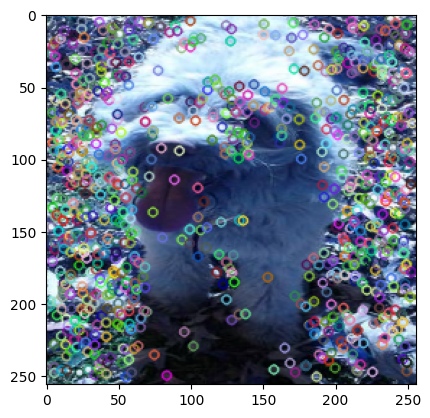

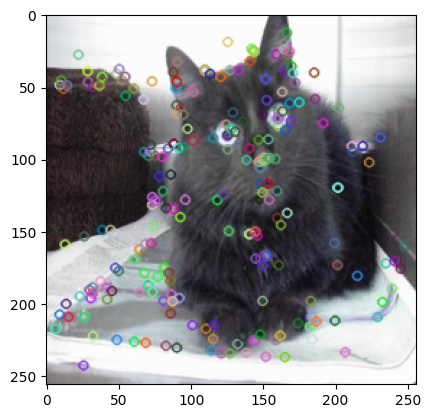

In [18]:
def visualize_results():
    idx = np.random.randint(0, len(data), 5)
    for id in idx:
        img = data[id][0]
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(img, None)
        img = cv2.drawKeypoints(img, keypoints, img)
        plt.imshow(img)
        plt.show()

visualize_results()

# 4

(1281998, 128)
Applying K-Means with k = 10
Done!


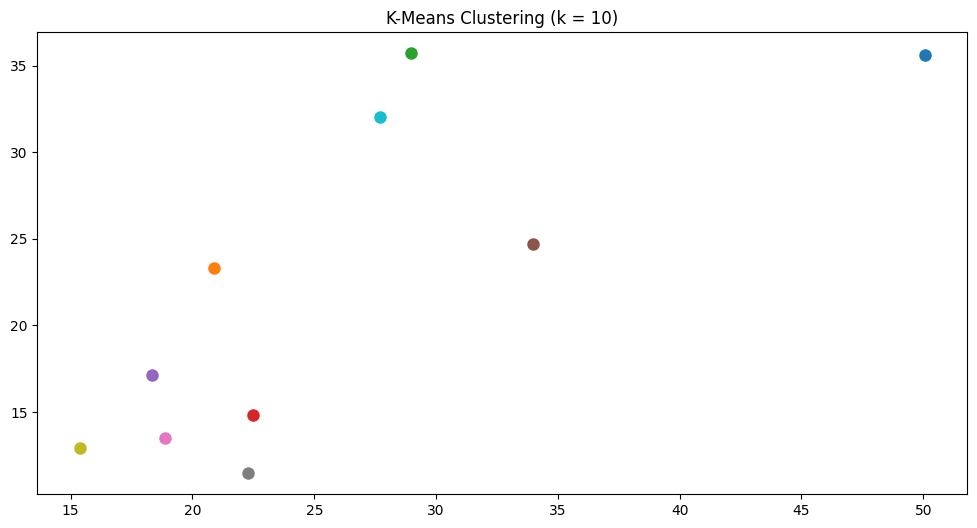

Applying K-Means with k = 20
Done!


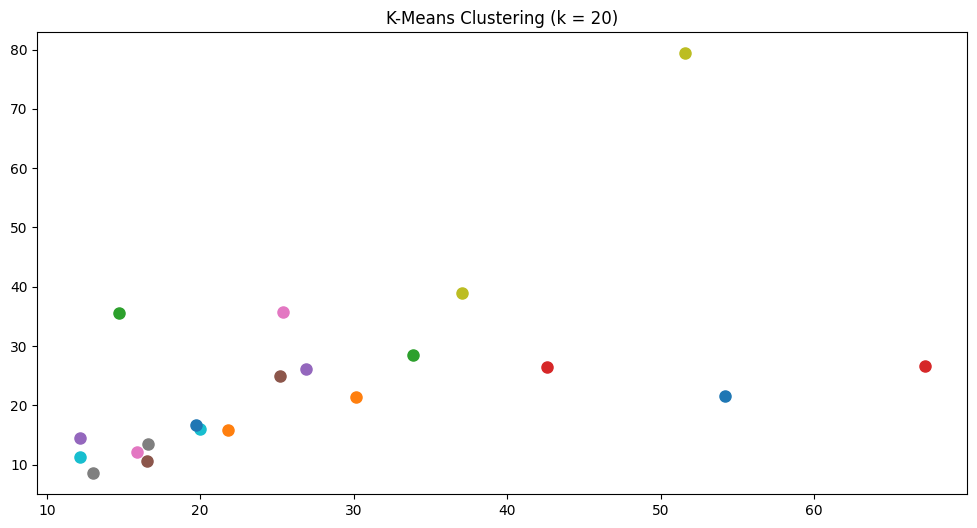

Applying K-Means with k = 40
Done!


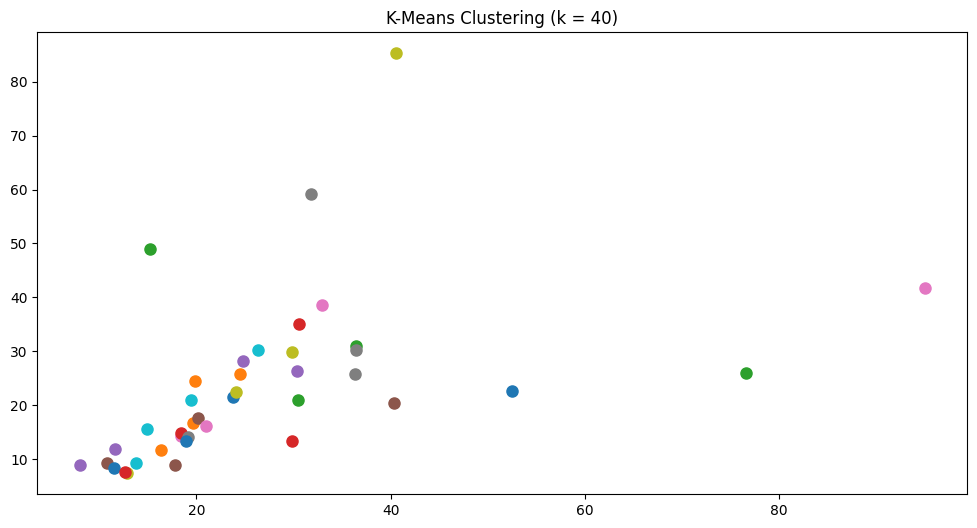

Applying K-Means with k = 50
Done!


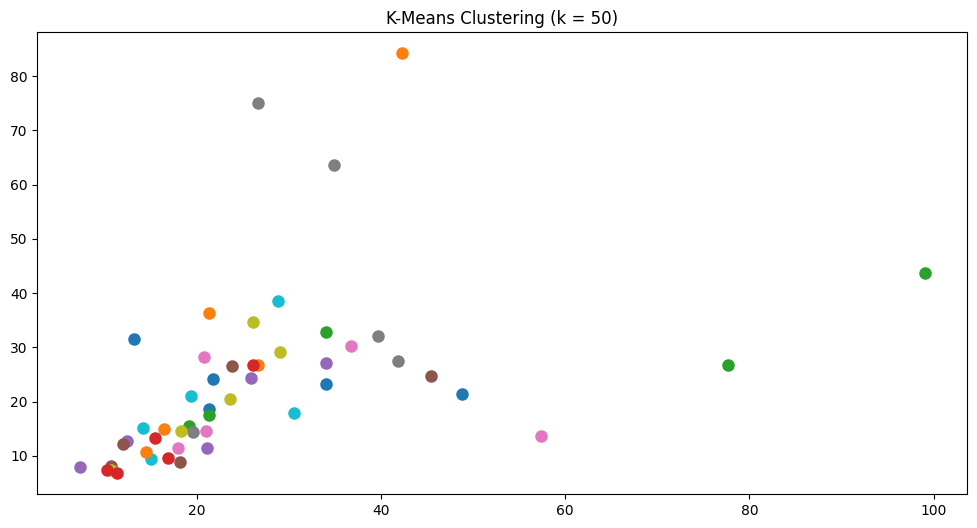

In [19]:
#For all the features, apply with the K-Means algorithm. Discuss the influence of different values of k on the results.
from sklearn.cluster import KMeans

def apply_KMeans(k, descriptors):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(descriptors)
    return kmeans

def plot_clusters(kmeans):
    plt.figure(figsize=(12, 6))
    for i in range(kmeans.n_clusters):
        cluster = kmeans.cluster_centers_[i]
        plt.plot(cluster[0], cluster[1], 'o', markersize=8)
    plt.title('K-Means Clustering (k = {})'.format(kmeans.n_clusters))
    plt.show()


descriptors = []
for i in range(len(data)):
    descriptors.append(np.load(data[i][2] + '_descriptors.npy'))
descriptors = np.vstack(descriptors)
print(descriptors.shape)

k_values = [10, 20, 40, 50]
Kmeanses = []
for k in k_values:
    print('Applying K-Means with k =', k)
    kmeans = apply_KMeans(k, descriptors)
    Kmeanses.append(kmeans)
    print('Done!')
    plot_clusters(kmeans)



## Discuss the influence of different values of k on the results.
1. **Underfitting and Overfitting**:
   - Choosing a small \(k\) value may lead to underfitting, where the data is overly simplified into fewer clusters, failing to capture the complex structure of the data.
   - Conversely, selecting a large \(k\) value may result in overfitting, where each data point is assigned to its own cluster, making the model too complex and unable to generalize to new data.

2. **Cluster Separation**:
   - As \(k\) increases, the separation between clusters also increases. Larger \(k\) values may lead to clearer boundaries between clusters, but can also result in some clusters being too small or containing noise points.

3. **Computational Complexity**:
   - Larger \(k\) values increase the computational complexity of the algorithm, as more iterations are needed to find the optimal cluster centers.


# 5

In [37]:
# Use the BoW model to quantize features and represent by frequencies.
from tqdm import trange

kmeans = Kmeanses[2]
cats = [None, None, None, np.zeros(kmeans.n_clusters)]
dogs = [None, None, None, np.zeros(kmeans.n_clusters)]
panda = [None, None, None, np.zeros(kmeans.n_clusters)]
print(kmeans.n_clusters)
def get_histogram():
    for i in range(len(data)):
        data[i][3] = np.zeros(kmeans.n_clusters)
    for i in trange(len(data), desc='Computing histograms'):
        descriptors = np.load(data[i][2] + '_descriptors.npy')
        prediction = kmeans.predict(descriptors)
        for j in range(len(prediction)):
            data[i][3][prediction[j]] += 1
        if data[i][1] == 0:
            cats[3] += data[i][3]
        elif data[i][1] == 1:
            dogs[3] += data[i][3]
        else :
            panda[3] += data[i][3]            
        
        np.save(data[i][2]+'_histogram.npy', data[i][3])
get_histogram()



40


Computing histograms: 100%|██████████| 3000/3000 [01:15<00:00, 39.93it/s]


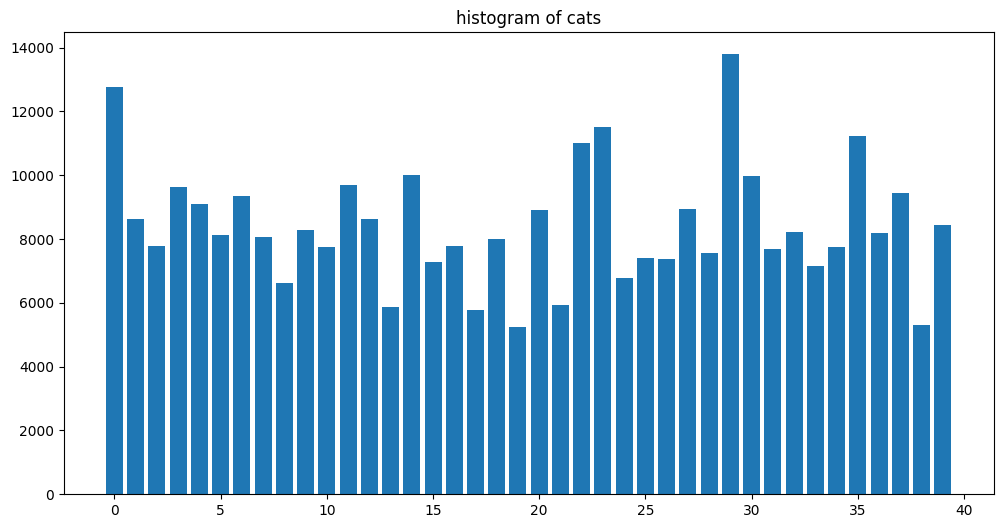

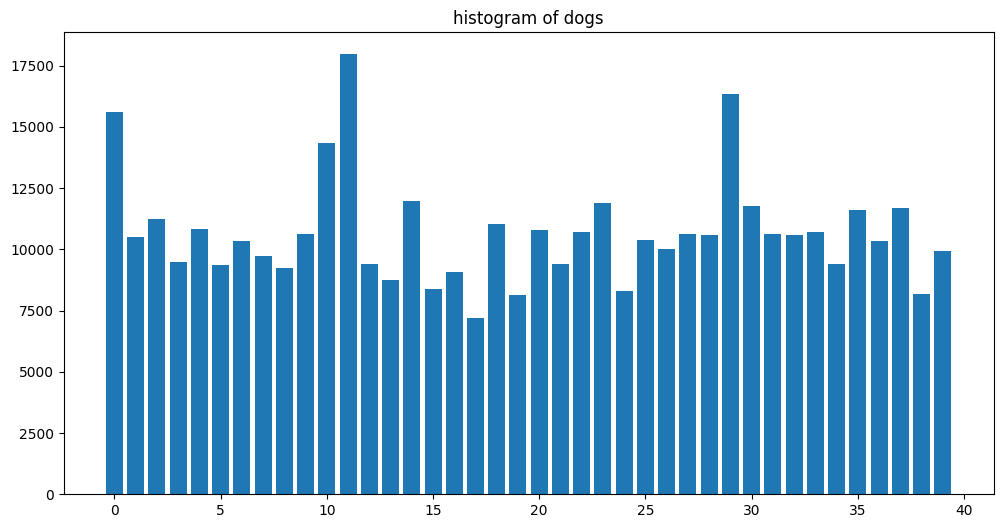

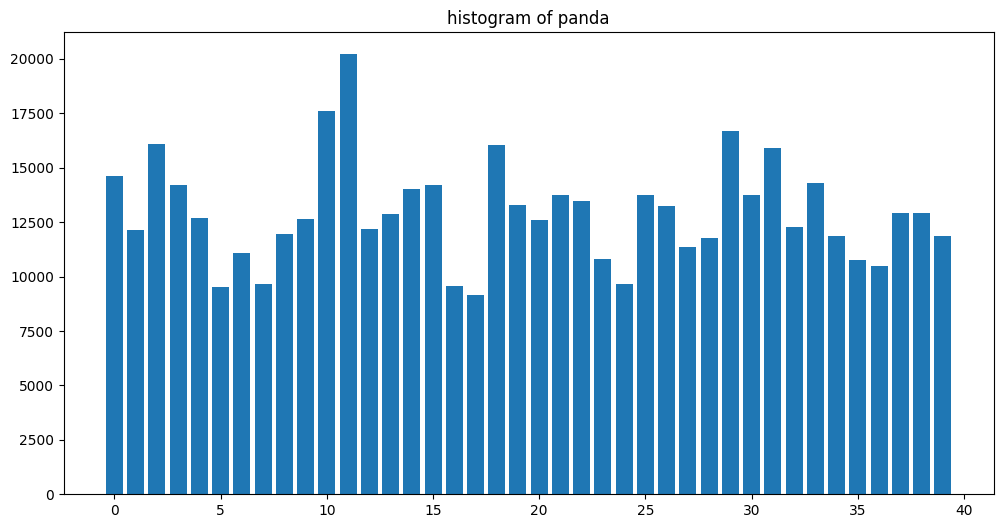

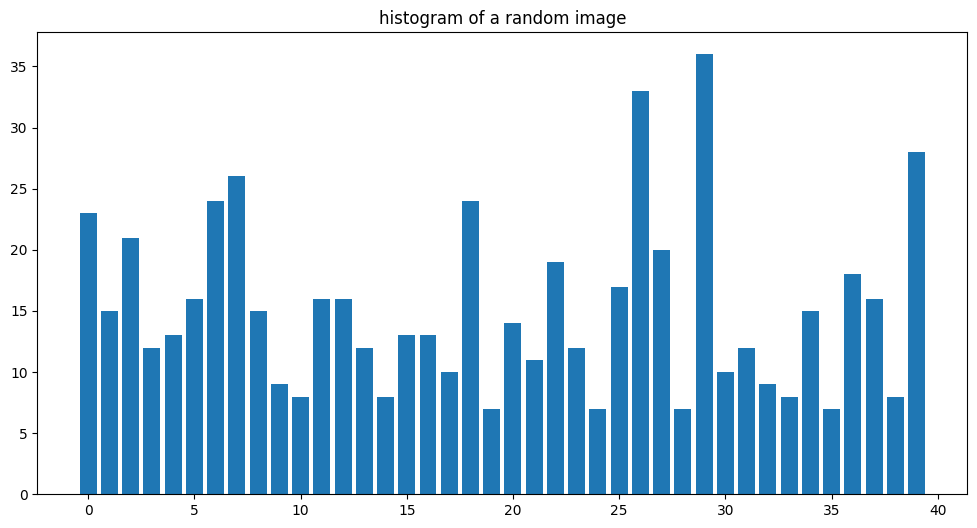

In [38]:
# plot the histogram of the BoW model
def plot_histogram(img,txt):
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(img[3])), img[3])
    plt.title(txt)
    plt.show()

plot_histogram(cats, "histogram of cats")
plot_histogram(dogs, "histogram of dogs")
plot_histogram(panda, "histogram of panda")

plot_histogram(data[np.random.randint(0, len(data))],"histogram of a random image")